C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[0 0 2 2 0 0 0 2 1 2 0 1 0 0 0 2 2 1 1 0 1 0 2 0 2 1 2 0 1 1 1 0 2 0 1 2 2
 2 0 0 0 1 1 1 0]
[0 0 2 2 0 0 0 2 1 2 0 1 0 0 0 2 2 1 1 0 1 0 2 0 2 1 2 0 1 1 1 0 2 0 1 2 2
 2 0 0 0 1 1 1 0]
1.0
[2 2 0 1 0 0 1 1 2 0 2 1 1 1 2 1 1 1 2 0 0 0 0 2 0 1 1 1 2 1 0 1 2 0 1 0 1
 0 0 0 2 2 1 2 0]
[2 2 0 1 0 0 1 1 2 0 2 1 1 1 2 1 1 1 2 0 0 0 0 2 0 1 1 1 2 2 0 1 2 0 1 0 1
 0 0 0 2 2 1 2 0]
0.977777777778


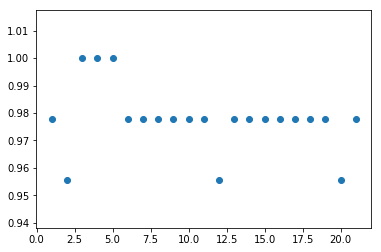

3


In [3]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn import metrics
iris = load_iris()
iris_X = iris.data
iris_y = iris.target
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size = 0.3)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
test_y_predicted = clf.predict(test_X)
print(test_y_predicted)
print(test_y)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

from sklearn.datasets import load_iris
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn import metrics

# 讀入鳶尾花資料
iris = load_iris()
iris_X = iris.data
iris_y = iris.target

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size = 0.3)

# 建立分類器
clf = neighbors.KNeighborsClassifier()
iris_clf = clf.fit(train_X, train_y)

# 預測
test_y_predicted = iris_clf.predict(test_X)
print(test_y_predicted)

# 標準答案
print(test_y)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

from sklearn.datasets import load_iris
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# 讀入鳶尾花資料
iris = load_iris()
iris_X = iris.data
iris_y = iris.target

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size = 0.3)

# 選擇 k
range = np.arange(1, round(0.2 * train_X.shape[0]) + 1)
accuracies = []

for i in range:
    clf = neighbors.KNeighborsClassifier(n_neighbors = i)
    iris_clf = clf.fit(train_X, train_y)
    test_y_predicted = iris_clf.predict(test_X)
    accuracy = metrics.accuracy_score(test_y, test_y_predicted)
    accuracies.append(accuracy)

# 視覺化
plt.scatter(range, accuracies)
plt.show()
appr_k = accuracies.index(max(accuracies)) + 1
print(appr_k)

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
data=datasets.fetch_olivetti_faces()
#print(data.DESCR)
#print(data.target)
#print(data.data)
#plt.imshow(data.images[0],cmap='gray',interpolation='nearest')
#plt.show()
#把影像變成一列
targets=data.target
data=data.images.reshape(len(data.images),-1)
#訓練資料30張臉(300張圖片)，測試資料10張臉(100張圖片)
train=data[targets<30]
test=data[targets>=30]
# 從100張測試影像中,亂數選5張出來，變數test的大小變成(5,4096)
n_faces = 5
from sklearn.utils import check_random_state
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]
#把每張訓練影像和測試影像都切割成上下兩部分: X人臉上半部分
#， Y人臉下半部分。
n_pixels = data.shape[1]
X_train = train[:, :(n_pixels + 1) // 2]
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]
#決定預測的演算法
from sklearn.linear_model import LinearRegression
ESTIMATORS = {
    "Linear regression": LinearRegression(),
}
y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train) #模型訓練
    y_test_predict[name] = estimator.predict(X_test) 
    #模型預測
# Plot the completed faces
image_shape = (64, 64)
n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)
for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))
    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")
    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")
    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))
        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)
        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")
plt.show()

In [5]:
from sklearn import datasets
from sklearn.utils import check_random_state
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
data = datasets.fetch_olivetti_faces()
#print(data.DESCR)
#print(data.target)
#print(data.data)
targets = data.target
data = data.images.reshape((len(data.images), -1)) #把影像變成一列
train = data[targets < 30]
test = data[targets >= 30]
# 測試影像從100張亂數選5張出來，變數test的大小變成(5,4096)
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

#把每張訓練影像和測試影像都切割成上下兩部分: X人臉上半部分， Y人臉下半部分。
n_pixels = data.shape[1]
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

ESTIMATORS = {
    "Linear regression": LinearRegression(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()

TypeError: 'numpy.ndarray' object is not callable